In [54]:
import pandas as pd
df= pd.read_csv('/Users/baejinim/Downloads/study_performance.csv')

In [56]:
print(data.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [58]:
print(df.isnull().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [60]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"이상치 in {col}: \n{outliers}")

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

이상치 in math_score: 
     gender race_ethnicity parental_level_of_education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          24    

In [75]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       986 non-null    object
 1   race_ethnicity               986 non-null    object
 2   parental_level_of_education  986 non-null    object
 3   lunch                        986 non-null    object
 4   test_preparation_course      986 non-null    object
 5   math_score                   986 non-null    int64 
 6   reading_score                986 non-null    int64 
 7   writing_score                986 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.3+ KB
None
       math_score  reading_score  writing_score
count  986.000000     986.000000     986.000000
mean    66.694726      69.723124      68.648073
std     14.340780      13.910716      14.427092
min     27.000000      31.000000      32.000000
25%     57.000000      60.000000   

# 시각화는 GPT의 힘을 빌렸습니다...

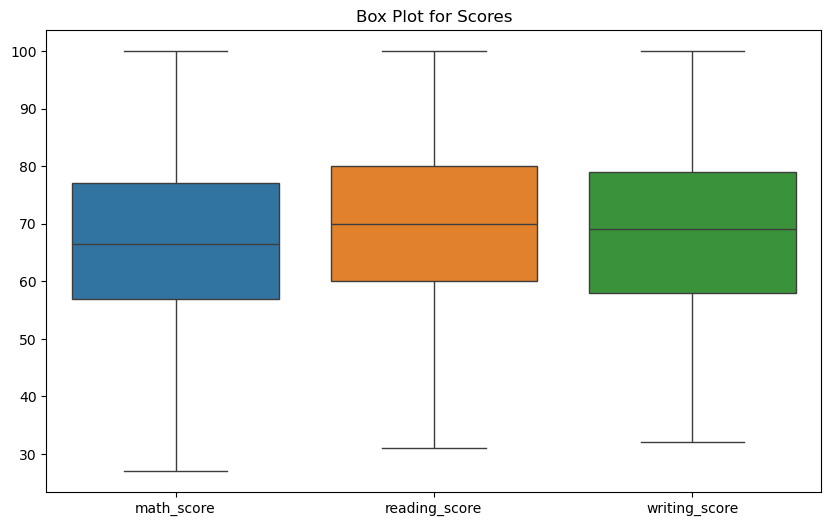

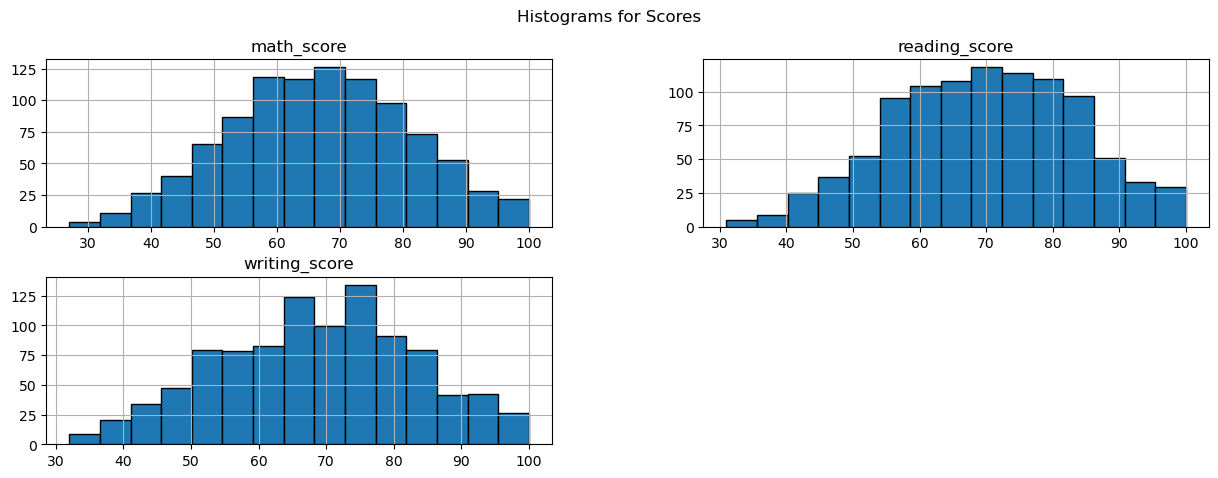

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상자그림 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['math_score', 'reading_score', 'writing_score']])
plt.title('Box Plot for Scores')
plt.show()

# 히스토그램 그리기
df[['math_score', 'reading_score', 'writing_score']].hist(bins=15, figsize=(15, 5), edgecolor='black')
plt.suptitle('Histograms for Scores')
plt.show()

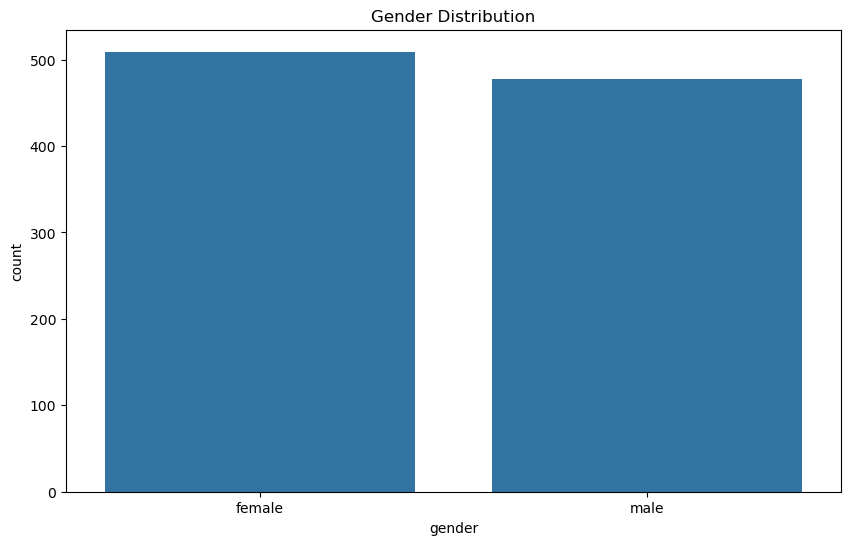

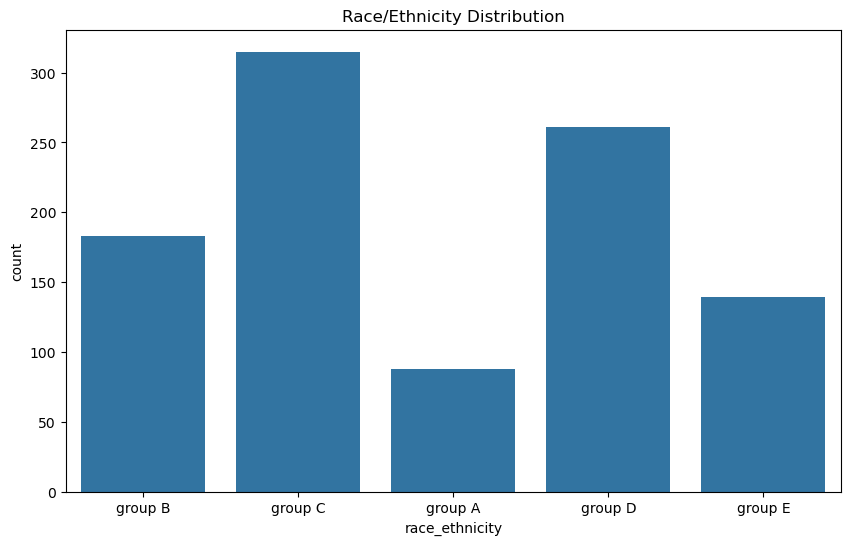

/var/folders/wc/464617yd7y70f8v2f5tbdmgc0000gn/T/ipykernel_23410/3615956392.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='parental_level_of_education', y='math_score', ci=None)


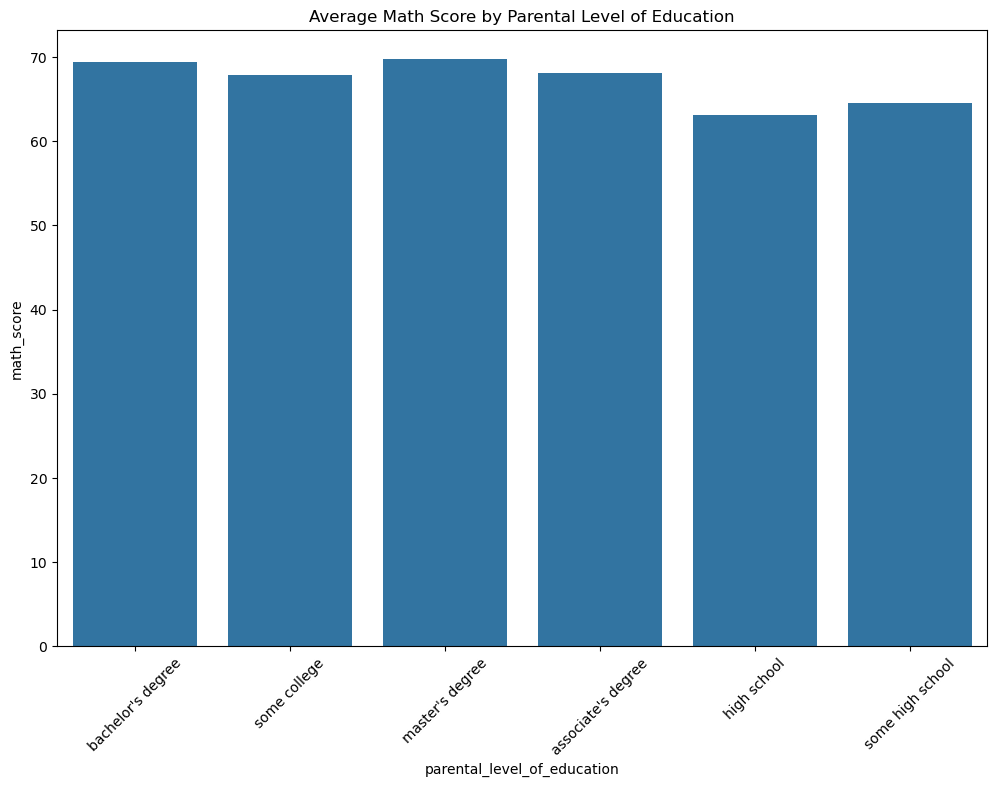

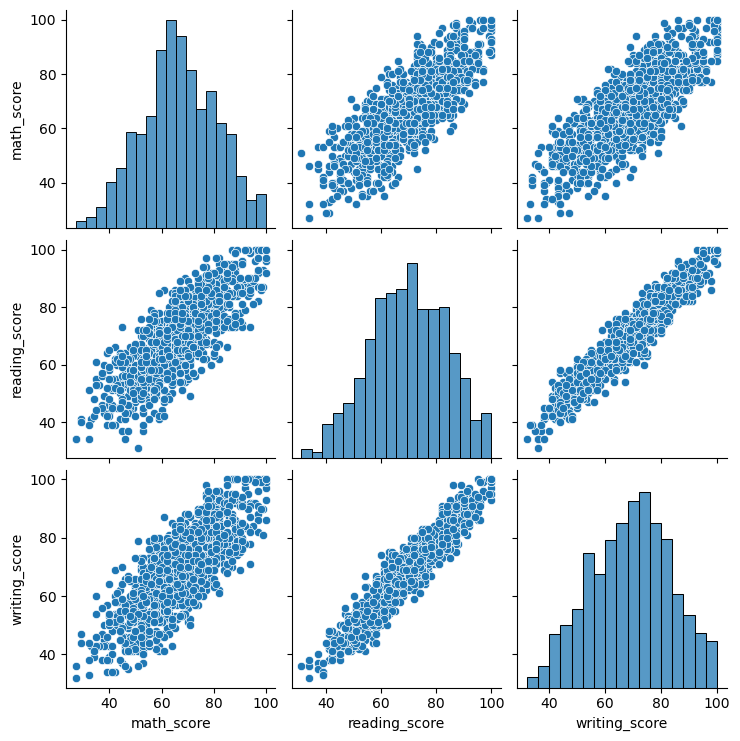

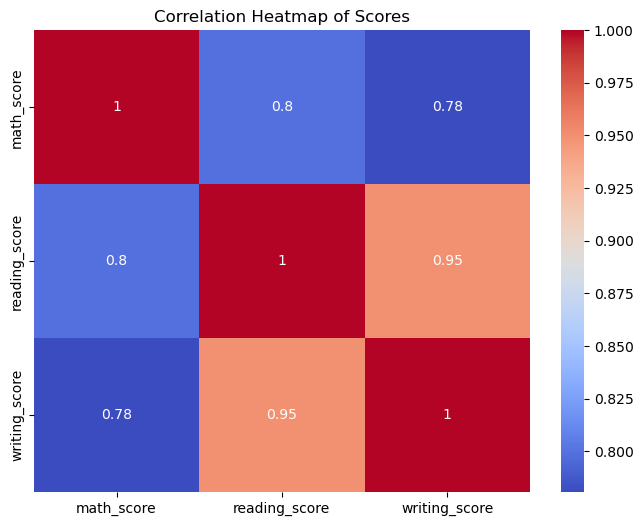

In [81]:
# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race_ethnicity')
plt.title('Race/Ethnicity Distribution')
plt.show()

# 범주형 변수에 따른 평균 점수 계산 및 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='parental_level_of_education', y='math_score', ci=None)
plt.title('Average Math Score by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()# 산점도 행렬 그리기
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']])
plt.show()

# 수치형 변수들 간의 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scores')
plt.show()